In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os, subprocess

# **Ques 1**

In [337]:
class Perceptron:
    def __init__(self, N):
        # Creation of random linearly separated dataset
        xA,yA,xB,yB = [random.uniform(-4, 4) for i in range(4)]
        self.V = np.array([xB*yA-xA*yB, yB-yA, xA-xB])
        self.X = self.generate_points(N)
 
    def generate_points(self, N):
      X = []
      for i in range(N):
        x1,x2 = [random.uniform(-4, 4) for i in range(2)]
        x = np.array([1,x1,x2])
        s = int(np.sign(self.V.T.dot(x)))
        X.append((x, s))
      return X
 
    def plot(self, mispts=None, vec=None, save=False):
        fig = plt.figure(figsize=(5,5))
        plt.xlim(-4,4)
        plt.ylim(-4,4)
        V = self.V
        a, b = -V[1]/V[2], -V[0]/V[2]
        l = np.linspace(-4,4)
        plt.plot(l, a*l+b, 'k-')
        cols = {1: 'r', -1: 'b'}
        for x,s in self.X:
            plt.xlabel("x coordinate")
            plt.ylabel("y coordinate")
            plt.title("Dataset with the classifier")
            plt.plot(x[1], x[2], cols[s]+'o')
       
 
    def classification_error(self, vec, pts=None):
        # Error defined as fraction of misclassified points
        if not pts:
            pts = self.X
        M = len(pts)
        n_mispts = 0
        for x,s in pts:
            if int(np.sign(vec.T.dot(x))) != s:
                n_mispts += 1
        error = n_mispts / float(M)
        return error
 
    def choose_miscl_point(self, vec):
        # Choosing a random point among the misclassified
        pts = self.X
        mispts = []
        for x,s in pts:
            if int(np.sign(vec.T.dot(x))) != s:
                mispts.append((x, s))
        return mispts[random.randrange(0,len(mispts))]
 
    def perc_learn_algo(self):
        # Initializing the weigths to zeros
        w = np.zeros(3)
        X, N = self.X, len(self.X)
        it = 0
        # Iterating till all the points are correctly classified
        while self.classification_error(w) != 0:
            it += 1
            # Picking random misclassified point
            x, s = self.choose_miscl_point(w)
            # Updating weights
            w += s*x         
        self.w = w
 
    def check_error(self, M, vec):
        check_pts = self.generate_points(M)
        return self.classification_error(vec, pts=check_pts)

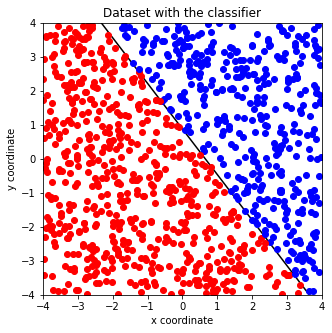

In [338]:
p = Perceptron(1000) #setting number of datapoints as 1000
p.plot()

**Analysis:** 
Number of iterations required for perfect classification = 100

# **Ques 2**

**Generation of dataset**

In [339]:
D = np.random.rand(1000, 2) #(no. of data points, dimension)
print (D)

[[0.71701797 0.39093731]
 [0.09516825 0.13559688]
 [0.97390296 0.05171766]
 ...
 [0.77353312 0.90221515]
 [0.23347744 0.773349  ]
 [0.02894669 0.04472428]]


In [340]:
X = D[:,0]
Y = D[:,1]
# print(X)
# print(X.shape)

**Steps of Gradient Descent Algorithm:**

1. Randomly initialize the bias and the weight theta
2. Calculate predicted value of y that is Y given the bias and the weight
3. Calculate the cost function from predicted and actual values of Y
4. Calculate gradient and the weight

In [341]:
# To start, we will take a random value for bias and weights,
import random
def initialize():
  b=random.random()
  theta=random.random()
  return b,theta
b,theta=initialize() #here, weight is of 1D as, X is of 1D (no. of independent variables=1)
print("Bias: ",b,"Weights: ",theta)


Bias:  0.7798046583031081 Weights:  0.6373886289860563


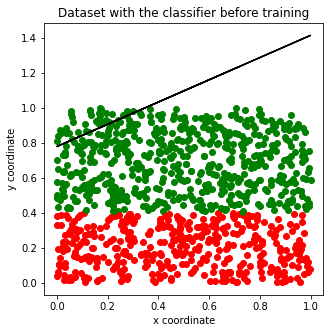

In [342]:
fig = plt.figure(figsize=(5,5))
plt.plot(X, theta*X + b, 'k-')
for i in range(0,len(X)):
  plt.xlabel("x coordinate")
  plt.ylabel("y coordinate")
  plt.title("Dataset with the classifier before training")
  if Y[i] < 0.4:
    plt.scatter(X[i],Y[i],c='r')
  if Y[i] > 0.4:
    plt.scatter(X[i],Y[i],c='g')

In [343]:
# calculating the output (Y) using these weights and bias.
# In gradient descent algo, w is the slope and b is the intercept
def predict_Y(b,theta,X):
  return ((theta * X) + b).reshape(1000)
Y_hat=predict_Y(b,theta,X) #Y_hat = predicted value
Y_hat[0:10]

array([1.23682376, 0.84046382, 1.40055933, 1.23338273, 0.86219322,
       0.97258705, 1.32325661, 1.00101071, 0.89194531, 1.34149694])

In [344]:
import math

def get_cost(y_pred, y_true):          #MAE loss function
  abs_error = np.abs(y_pred - y_true)
  sum_abs_error = np.sum(abs_error)
  loss = sum_abs_error / y_true.size
  return loss

Y_hat=predict_Y(b,theta,X)
get_cost(Y,Y_hat)

0.6001072624176308

**Gradient Descent Algorithm**

The parameters passed to the gradient descent formula are

  x,y : the input and output variable

  y_hat: predicted value with current bias and weights

  b_0,theta_0: current bias and weights

  Learning rate: learning rate to adjust the update step


In [345]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
  db=(np.sum(y_hat-y)*2)/len(y)
  dw=(np.dot((y_hat-y),x)*2)/len(y)
  b_1=b_0-learning_rate*db
  theta_1=theta_o-learning_rate*dw
  return b_1,theta_1
print("After initialization, Bias: ",b,"theta: ",theta)
Y_hat=predict_Y(b,theta,X)
b,theta=update_theta(X,Y,Y_hat,b,theta,0.01)
print("After first update, Bias: ",b,"theta: ",theta)
print("Loss after 1st iteration: ",get_cost(Y,Y_hat))

After initialization, Bias:  0.7798046583031081 theta:  0.6373886289860563
After first update, Bias:  0.7678902921937067 theta:  0.6305064444674696
Loss after 1st iteration:  0.6001072624176308


Gradient descent function with 200 iterations

In [346]:
def run_gradient_descent(X,Y,alpha,num_iterations):
  b,theta=initialize()
  iter_num=0
  gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
  result_idx=0
  for each_iter in range(num_iterations):
    Y_hat=predict_Y(b,theta,X)
    this_cost=get_cost(Y,Y_hat)
    prev_b=b
    prev_theta=theta
    b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
    if(iter_num%10==0):
      gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
      result_idx=result_idx+1
    iter_num +=1
  print(f"Final Estimate of b and theta for learning rate = {alpha} and no. of iterations = {num_iterations}: ",b," and ",theta)
  return gd_iterations_df,b,theta

gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=200)

Final Estimate of b and theta for learning rate = 0.001 and no. of iterations = 200:  0.1641081821001977  and  0.2924491145128962


In [347]:
#plotting the cost function to iterations to see the result.
gd_iterations_df[0:20]

,iteration,cost
0,0.0,0.345411
1,10.0,0.340972
2,20.0,0.336705
3,30.0,0.332662
4,40.0,0.328755
5,50.0,0.325039
6,60.0,0.321506
7,70.0,0.318181
8,80.0,0.315016
9,90.0,0.312011


As we can see the cost function decreases with increase in iterations, but we still have not reached convergence. Now, let’s try with α=0.01 for 1500 iterations 

Final Estimate of b and theta for learning rate = 0.001 and no. of iterations = 1500:  0.5137963210367098  and  -0.01884032270667113
Final Estimate of b and theta for learning rate = 0.01 and no. of iterations = 1500:  0.4881724541148943  and  0.012656374425481306


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

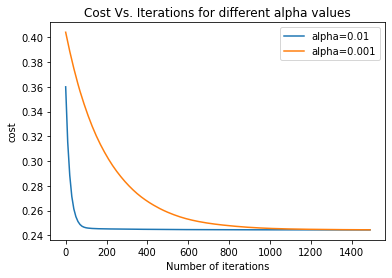

In [348]:
alpha_df_2,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=1500)
alpha_df_1,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=1500)
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label="alpha=0.01")
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label="alpha=0.001")
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')

As one can see, for this particular dataset, 0.01 is the more optimal learning rate as it converges much quicker than 0.001

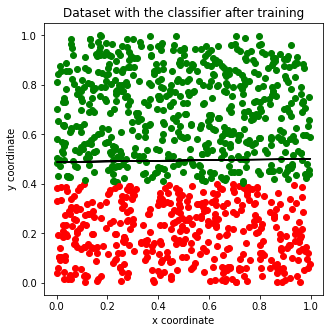

In [349]:
fig = plt.figure(figsize=(5,5))
plt.plot(X, theta*X + b, 'k-')

for i in range(0,len(X)):
  plt.xlabel("x coordinate")
  plt.ylabel("y coordinate")
  plt.title("Dataset with the classifier after training")
  if Y[i] < 0.4:
    plt.scatter(X[i],Y[i],c='r')
  if Y[i] > 0.4:
    plt.scatter(X[i],Y[i],c='g')

# **Ques 3**

**Creating dataset**
Generated two sets of 2D points, one lying on the circumference of a circle with radius r1=5 and another on a circle with radius r2=3. The data from each set is concatenated and assigned labels 0 and 1 (binary classification)

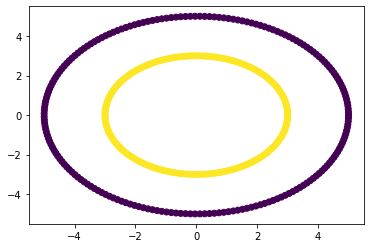

(2, 400)
(1, 400)


In [362]:
#contains 400 data points

np.random.seed(0)

r1 = 5
r2 = 3

theta = np.linspace(0, 2 * np.pi, 200)
x1 = r1 * np.cos(theta)
y1 = r1 * np.sin(theta)
x2 = r2 * np.cos(theta) 
y2 = r2 * np.sin(theta)

X = np.concatenate((np.column_stack((x1, y1)), np.column_stack((x2, y2))), axis=0)
Y = np.concatenate((np.zeros(200), np.ones(200)), axis=0)
# np.random.shuffle(Y)

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

# Normalizing so that the model learns faster
X -= X.min()
X /= X.max()

X = X.T
Y = Y.reshape(1,400)
print(X.shape)
print(Y.shape)


Activation function

In [363]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

**Defining the neural network** having one hidden layer with 20 neurons

In [365]:
# defining the model architecture
inputLayer_neurons = X.shape[0]  # number of features in data set
hiddenLayer_neurons = 20  # number of hidden layers neurons
outputLayer_neurons = 1  # number of neurons at output layer

# initializing the weights
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(
    size=(hiddenLayer_neurons, outputLayer_neurons)
)

# defining the parameters
lr = 0.1
epochs = 10000

While I tried with lr = 0.01 and no.of epochs =1000, loss was not getting converged.

In [366]:
epc=[] #for storing epoch count
err=[] #for storing average loss till that epoch
for epoch in range(0, epochs):
    ## Forward Propogation

    # calculating hidden layer activations
    hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
    hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

    # calculating the output
    outputLayer_linearTransform = np.dot(weights_hidden_output.T, hiddenLayer_activations)
    output = sigmoid(outputLayer_linearTransform)

    ## Back Propagation

    # error calculation
    error = get_cost(output,Y)  #using MAE error from ques 2

    # calculating rate of change of error w.r.t weight between hidden and output layer
    error_wrt_output = -(Y - output)
    output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
    outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

    error_wrt_weights_hidden_output = np.dot(
        outputLayer_LinearTransform_wrt_weights_hidden_output,
        (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
    )

    # calculating rate of change of error w.r.t weights between input and hidden layer
    outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(hiddenLayer_activations, (1 - hiddenLayer_activations))
    hiddenLayer_linearTransform_wrt_weights_input_hidden = X
    error_wrt_weights_input_hidden = np.dot(
        hiddenLayer_linearTransform_wrt_weights_input_hidden,
        (
            hiddenLayer_activations_wrt_hiddenLayer_linearTransform
            * np.dot(
                outputLayer_LinearTransform_wrt_hiddenLayer_activations,
                (output_wrt_outputLayer_LinearTransform * error_wrt_output),
            )
        ).T,
    )
    # updating the weights
    weights_hidden_output = weights_hidden_output - error_wrt_weights_hidden_output * lr
    weights_input_hidden = weights_input_hidden - error_wrt_weights_input_hidden * lr

    
    if epoch%100 == 0:
      err.append(np.average(error))
      epc.append(epoch)

Text(0.5, 1.0, 'Error Vs. Epochs ')

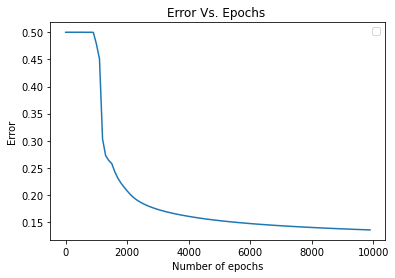

In [367]:
plt.plot(epc,err)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of epochs')
plt.title('Error Vs. Epochs ')

In [368]:
# final output from the model
output

array([[7.32615117e-01, 7.20883199e-01, 7.06029304e-01, 6.88850455e-01,
        6.70034721e-01, 6.50183651e-01, 6.29820667e-01, 6.09393600e-01,
        5.89276242e-01, 5.69771335e-01, 5.51115687e-01, 5.33487184e-01,
        5.17013000e-01, 5.01778232e-01, 4.87834317e-01, 4.75206779e-01,
        4.63902047e-01, 4.53913237e-01, 4.45224922e-01, 4.37816962e-01,
        4.31667514e-01, 4.26755341e-01, 4.23061556e-01, 4.20570886e-01,
        4.19272553e-01, 4.19160840e-01, 4.20235380e-01, 4.22501194e-01,
        4.25968486e-01, 4.30652166e-01, 4.36571083e-01, 4.43746892e-01,
        4.52202488e-01, 4.61959913e-01, 4.73037611e-01, 4.85446932e-01,
        4.99187757e-01, 5.14243168e-01, 5.30573132e-01, 5.48107280e-01,
        5.66736996e-01, 5.86307219e-01, 6.06608578e-01, 6.27370625e-01,
        6.48256962e-01, 6.68862814e-01, 6.88714912e-01, 7.07272236e-01,
        7.23924241e-01, 7.37980409e-01, 7.48641573e-01, 7.54939243e-01,
        7.55624562e-01, 7.48985475e-01, 7.32578438e-01, 7.029116

 Plotting the decision boundary

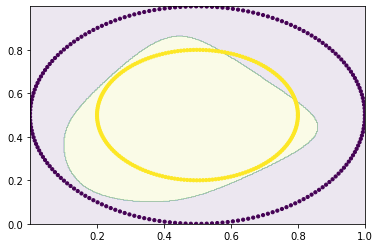

In [369]:

data_pts = 400
x_span = np.linspace(X[0, :].min(), X[0, :].max(), data_pts)
y_span = np.linspace(X[1, :].min(), X[1, :].max(), data_pts)
xx, yy = np.meshgrid(x_span, y_span)

# forward pass designed for the region of interest
hiddenLayer_linearTransform = np.dot(
    weights_input_hidden.T, np.c_[xx.ravel(), yy.ravel()].T
)
hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)
outputLayer_linearTransform = np.dot(weights_hidden_output.T, hiddenLayer_activations)
output_span = sigmoid(outputLayer_linearTransform)

# Make predictions across region of interest
labels = (output_span > 0.5).astype(int)

# Plotting decision boundary on region of interest
z = labels.reshape(xx.shape)
fig, ax = plt.subplots()
ax.contourf(xx, yy, z, alpha=0.1)

# creating scatter plot
ax.scatter(X[0, :], X[1, :], s=10, c=Y.squeeze())